# Import packages

In [ ]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataDir="/content/drive/MyDrive/Comp Med Group Project/data"
rootDir="/content/drive/MyDrive/Comp Med Group Project"

# Load in metadata and clinical files.

I will pick 5 patients with the same DNA methylation and miRNA assay to test code. Each patient will likely have a large feature matrix for each assay.

In [ ]:
metadataDir="/content/drive/MyDrive/Comp Med Group Project/UsableMetadata.csv"
metadataDf=pd.read_csv(metadataDir)

In [ ]:
clinicalDir="/content/drive/MyDrive/Comp Med Group Project/UsableClinical.csv"
clinicalDf=pd.read_csv(clinicalDir)

In [ ]:
# Columns of methylation=["Loci","Beta"]
# Columns of miRNA=["miRNA_ID", "read_count","reads_per_million_miRNA_mapped","cross-mapped"]
# I'm assuming reads_per_million_miRNA_mapped is talking about frequency of miRNA in the pool so I will use that column
# Let's transpose the dataframes so loci/ID are on columns and values are on rows. That gives 1 value per feature per patient.
# Aggregating all patients gives us a matrix of samples (rows) x features (columns).
# We will keep a separate matrix for methylation and miRNA to use them in different views for MKKC. We can concatenate them for meta-clustering.

In [ ]:
metadataDf.drop(columns="Unnamed: 0",inplace=True)
metadataDf.sort_values(by="case_id",inplace=True,ignore_index=True)

In [ ]:
allCases=metadataDf["case_id"].unique()
rootDir="/content/drive/MyDrive/Comp Med Group Project"
with open(os.path.join(rootDir,"allCases.txt"), "w") as f:
  for item in allCases:
    f.write(item + "\n")

Separate "Illumina Human Methylation 27" data into 1 matrix first.

In [ ]:
dataDir="/content/drive/MyDrive/Comp Med Group Project/data"
rootDir="/content/drive/MyDrive/Comp Med Group Project"

assay="Illumina Human Methylation 27"
meth27Df = metadataDf[metadataDf["platform"]==assay]
caseList=meth27Df["case_id"].values
fileList=meth27Df["file_id"].values

data=[]
loci=[]

for folderName in fileList:
  folderDir=os.path.join(dataDir,folderName)
  fileName=os.listdir(folderDir)[0]
  fileDir=os.path.join(dataDir,folderName,fileName)
  methDf=pd.read_csv(fileDir,sep="\t",names=["Locus","Beta"])
  loci.append(methDf["Locus"].to_list())
  data.append(methDf["Beta"].to_numpy())

# Check that all loci are the same
length_check=[len(i) for i in loci]
print(length_check)
item_check=[loci[i]==loci[i+1] for i in range(len(loci)-1)]
print(False in item_check)

# Save case_ids, loci and data
# with open(os.path.join(rootDir,"Methylation_27_cases.txt"), "w") as f:
#   cases = zip(caseList,fileList)
#   for item in cases:
#     f.write(f"{item[0]},{item[1]}\n")

# with open(os.path.join(rootDir,"Methylation_27_loci.txt"), "w") as f:
#   for item in loci[0]:
#     f.write(item + "\n")

data=np.array(data)
#np.savetxt(os.path.join(rootDir,"Methylation_27_data.txt"),data)

ParserError: ignored

In [ ]:
# Methylation 27 has 380 samples and 27578 features

meth27=np.loadtxt(os.path.join(rootDir,"Methylation_27_data.txt"))
meth27.shape

(380, 27578)

Separate "Illumina Human Methylation 450" data into 1 matrix next.

In [ ]:
dataDir="/content/drive/MyDrive/Comp Med Group Project/data"
rootDir="/content/drive/MyDrive/Comp Med Group Project"

assay="Illumina Human Methylation 450"
meth450Df = metadataDf[metadataDf["platform"]==assay]
caseList=meth450Df["case_id"].values
fileList=meth450Df["file_id"].values

data=[]
loci=[]

for folderName in fileList:
  folderDir=os.path.join(dataDir,folderName)
  fileName=os.listdir(folderDir)[0]
  fileDir=os.path.join(dataDir,folderName,fileName)
  methDf=pd.read_csv(fileDir,sep="\t",names=["Locus","Beta"])
  loci.append(methDf["Locus"].to_list())
  data.append(methDf["Beta"].to_numpy())


# Check that all loci are the same
length_check=[len(i) for i in loci]
print(length_check)
item_check=[loci[i]==loci[i+1] for i in range(len(loci)-1)]
print(False in item_check)

[486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427, 486427,

In [ ]:
import os

# Save case_ids, loci and data
with open(os.path.join(rootDir,"Methylation_450_cases.txt"), "w") as f:
  cases = zip(caseList,fileList)
  for item in cases:
    f.write(f"{item[0]},{item[1]}\n")

with open(os.path.join(rootDir,"Methylation_450_loci.txt"), "w") as f:
  for item in loci[0]:
    f.write(item + "\n")

data=np.array(data)
np.savetxt(os.path.join(rootDir,"Methylation_450_data.txt"),data)

In [ ]:
# Methylation 450 has 287 samples and 486427 features

meth450=np.loadtxt(os.path.join(rootDir,"Methylation_450_data.txt"))
meth450.shape

KeyboardInterrupt: ignored

Finally, let's handle miRNA data.

In [ ]:
dataDir="/content/drive/MyDrive/Comp Med Group Project/data"
rootDir="/content/drive/MyDrive/Comp Med Group Project"

assay="miRNA Expression Quantification"
mimetaDf = metadataDf[metadataDf["data_type"]==assay]
caseList=mimetaDf["case_id"].values
fileList=mimetaDf["file_id"].values

data=[]
loci=[]

for folderName in fileList:
  folderDir=os.path.join(dataDir,folderName)
  fileName=os.listdir(folderDir)[0]
  fileDir=os.path.join(dataDir,folderName,fileName)
  miDf=pd.read_csv(fileDir,sep="\t")
  loci.append(miDf["miRNA_ID"].to_list())
  data.append(miDf["reads_per_million_miRNA_mapped"].to_numpy())


# Check that all loci are the same
length_check=[len(i) for i in loci]
print(length_check)
item_check=[loci[i]==loci[i+1] for i in range(len(loci)-1)]
print(False in item_check)

[1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 188

In [ ]:
import os

# Save case_ids, loci and data
with open(os.path.join(rootDir,"miRNA_cases_cases.txt"), "w") as f:
  cases = zip(caseList,fileList)
  for item in cases:
    f.write(f"{item[0]},{item[1]}\n")

with open(os.path.join(rootDir,"miRNA_cases_loci.txt"), "w") as f:
  for item in loci[0]:
    f.write(item + "\n")

data=np.array(data)
np.savetxt(os.path.join(rootDir,"miRNA_cases_data.txt"),data)

In [ ]:
# miRNA has 321 samples and 1881 features

miRNA=np.loadtxt(os.path.join(rootDir,"miRNA_cases_data.txt"))
miRNA.shape

(321, 1881)

For meta-clustering related work, we should concatenate all features into one matrix. To do that, we can load all data into dataframes and concatenate them.

In [ ]:
def data_to_df(data_type):

  meth27=np.loadtxt(os.path.join(rootDir, f"{data_type}_data.txt"))
  meth27Cols=[]
  with open(os.path.join(rootDir,f"{data_type}_loci.txt"),"r") as f:
    for line in f:
      line=line.strip()
      meth27Cols.append(line)

  meth27index=[]
  with open(os.path.join(rootDir, f"{data_type}_cases.txt"),"r") as f:
    for line in f:
      line=line.strip().split(",")
      caseID,fileID=line[0],line[1]
      meth27index.append(caseID)

  meth27Df=pd.DataFrame(meth27, columns=meth27Cols, index=meth27index)
  print(f'Number of samples: {len(meth27Df)}')
  print(f'Number of features: {len(meth27Df.columns)}')

  return meth27Df


In [ ]:
meth27Df = data_to_df("Methylation_27")

Number of samples: 380
Number of features: 27578


In [ ]:
# meth450Df = data_to_df("Methylation_450")

KeyboardInterrupt: ignored

50 patients have both methylation assays. 25978 loci in methylation 27 are found in methylation 450 (leaving 1600 unique in methylation 27). It is still okay to combine these data as the assays may have been done at different timepoints so they capture a different biological state.

In [ ]:
overlapsCols=[i for i in meth27Df.columns if i in meth450Df.columns]
len(overlapsCols)

25978

In [ ]:
overlapsCases=[i for i in meth27Df.index if i in meth450Df.index]
len(overlapsCases)

50

When we merge the dataframes, we get 667 samples and 488027 features, which means all samples and non-overlapping features are preserved.

In [ ]:
# mergedMeth=pd.concat([meth450Df,meth27Df],axis=0)
# mergedMeth

In [ ]:
miRNADf = data_to_df("miRNA_cases")

Number of samples: 321
Number of features: 1881


Finally, merging with miRNA data gives 988 samples and 489908 features.

In [ ]:
mergedData=pd.concat([mergedMeth,miRNADf])
mergedData

,cg00000029,cg00000108,cg00000109,cg00000165,cg00000236,cg00000289,cg00000292,cg00000321,cg00000363,cg00000622,...,hsa-mir-941-5,hsa-mir-942,hsa-mir-943,hsa-mir-944,hsa-mir-95,hsa-mir-9500,hsa-mir-96,hsa-mir-98,hsa-mir-99a,hsa-mir-99b
02febd4b-c5ff-5f49-8cff-8bef39bb1808,0.583032,0.926064,0.909371,0.095072,0.820643,0.713095,0.776311,0.223509,0.323880,0.017987,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02febd4b-c5ff-5f49-8cff-8bef39bb1808,0.701239,0.979128,0.951219,0.124891,0.842551,0.860292,0.824334,0.216400,0.299699,0.017346,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
037529f8-6f85-55a9-ade5-7a80ef76c1d7,0.814958,0.969973,0.928999,0.183145,0.913046,0.850692,0.904613,0.251129,0.350501,0.012912,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
037529f8-6f85-55a9-ade5-7a80ef76c1d7,0.822989,0.967365,0.941057,0.258355,0.816195,0.810979,0.821220,0.180007,0.293107,0.011310,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
037529f8-6f85-55a9-ade5-7a80ef76c1d7,0.394299,0.863666,0.829664,0.348061,0.944535,0.800797,0.283056,0.330024,0.083825,0.012124,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fc171729-17c1-5857-adeb-4b3af1eb1bce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,88.812978,0.072323,2.603638,0.000000,0.0,19.671930,96.334599,27.989106,87.583483
fc171729-17c1-5857-adeb-4b3af1eb1bce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,31.047774,4.435396,0.000000,0.000000,0.0,0.000000,39.918566,4.435396,377.008680
fd97e840-a0d4-574b-be8d-c7cc9fb37bb9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,38.883194,0.316983,0.000000,0.211322,0.0,0.211322,117.389209,66.143695,456.983195
fe0fa666-d6eb-5188-b539-cd0f0f3df39c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,62.107030,0.171094,3.764062,2.737500,0.0,2.053125,129.517966,496.514050,435.775771


In [ ]:
mergedData.to_csv(os.path.join(rootDir,"allData.csv"))

KeyboardInterrupt: ignored

# Data cleaning and imputation

## Drop duplicates in data

In [ ]:
meth27Df = meth27Df[~meth27Df.index.duplicated(keep='first')]
print(f'Number of samples: {len(meth27Df)}')
print(f'Number of features: {len(meth27Df.columns)}')

miRNADf = miRNADf[~miRNADf.index.duplicated(keep='first')]
print(f'Number of samples: {len(miRNADf)}')
print(f'Number of features: {len(miRNADf.columns)}')

Number of samples: 169
Number of features: 27578
Number of samples: 262
Number of features: 1881


## Drop NaN columns and impute data

In [ ]:
def remove_na(df):

  num_samples = len(df)

  num_drop = 0
  for i in df.columns:
      na_props = df[i].isna().sum()/num_samples
      if na_props > 0.9:
        df.drop(labels=i, axis=1, inplace=True, )
        num_drop += 1

  print('Number of cols dropped: ', num_drop)
  return df

from sklearn.impute import SimpleImputer

def impute_data(df):

  data_arr = df.to_numpy()
  imp = SimpleImputer(missing_values=np.nan, strategy='mean')
  data_arr = imp.fit_transform(data_arr)
  df.iloc[:, :] = data_arr

  return df

In [ ]:
meth27Df_clean = remove_na(meth27Df)
meth27Df_clean = impute_data(meth27Df_clean)

Number of cols dropped:  2418


In [ ]:
miRNADf_clean = remove_na(miRNADf)
miRNADf_clean = impute_data(miRNADf_clean)

Number of cols dropped:  0


In [ ]:
print(f'Number of samples: {len(meth27Df_clean)}')
print(f'Number of features: {len(meth27Df_clean.columns)}')
print(f'Number of samples: {len(miRNADf_clean)}')
print(f'Number of features: {len(miRNADf_clean.columns)}')

Number of samples: 169
Number of features: 25160
Number of samples: 262
Number of features: 1881


## Merge data

In [ ]:
miRNADf_clean = miRNADf_clean.loc[meth27Df_clean.index]
print(f'Number of samples: {len(miRNADf_clean)}')
print(f'Number of features: {len(miRNADf_clean.columns)}')

Number of samples: 169
Number of features: 1881


In [ ]:
mergedData = pd.concat([meth27Df_clean, miRNADf_clean], axis=1)
data = mergedData.to_numpy()
print(data.shape)

(169, 27041)


# Exploratory Analysis

To find highly variable genes (HVG)

In [ ]:
meth27Df_clean.head()

,cg00000292,cg00002426,cg00003994,cg00005847,cg00006414,cg00007981,cg00008493,cg00008713,cg00009407,cg00011459,...,cg27651218,cg27652350,cg27653134,cg27654142,cg27655905,cg27657283,cg27661264,cg27662379,cg27662877,cg27665659
04ebc7ef-2c5b-589f-8d86-d26b9c071064,0.867132,0.977926,0.019414,0.483833,0.027973,0.022180,0.989892,0.008672,0.007824,0.974481,...,0.967356,0.577519,0.950765,0.923628,0.018910,0.016132,0.369256,0.007919,0.014457,0.019542
05f356b4-e059-5cf3-92f9-a83759d7dbaa,0.424751,0.977980,0.021157,0.120094,0.039028,0.018047,0.985375,0.014947,0.008556,0.975582,...,0.967797,0.422322,0.938884,0.324725,0.018942,0.019433,0.158066,0.008988,0.017135,0.155323
06cd1d5f-9918-5db2-8c0d-3a0cedea5748,0.810781,0.944099,0.166327,0.364991,0.037631,0.015103,0.985093,0.011001,0.009114,0.968135,...,0.960722,0.454585,0.900168,0.442218,0.020570,0.022391,0.428049,0.009667,0.017360,0.217764
08351be5-e095-5ab9-8d70-ae93037b5223,0.794215,0.967557,0.018093,0.045618,0.026945,0.015807,0.986378,0.014593,0.009991,0.976374,...,0.942892,0.057812,0.945667,0.328338,0.022044,0.021724,0.386438,0.010214,0.015832,0.028907
0a30a0cf-28b5-5342-850d-ea6fbe9aa356,0.793232,0.913704,0.015147,0.094718,0.034614,0.015364,0.981718,0.011595,0.010087,0.970663,...,0.927355,0.037335,0.855438,0.020606,0.019480,0.018103,0.309987,0.011393,0.016185,0.015843


In [ ]:
loci=meth27Df_clean.columns
means_mth=[]
vars_mth=[]
for i in loci:
  mean=meth27Df_clean[i].mean()
  means_mth.append(mean)
  var=meth27Df_clean[i].var()
  vars_mth.append(var)

In [ ]:
means_mth=np.array(means_mth)
vars_mth=np.array(vars_mth)

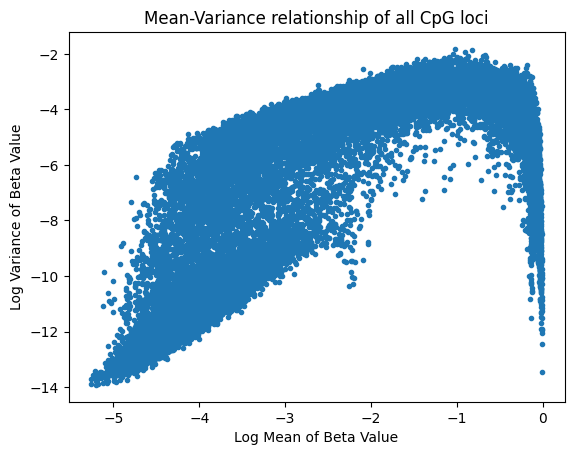

In [ ]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

def func(x, a, b, c):
     return a / (1 + np.exp(-b * (x - c)))

log_mean_mth=np.log(means_mth)
log_var_mth=np.log(vars_mth)

plt.scatter(log_mean_mth,log_var_mth,marker=".")
plt.xlabel("Log Mean of Beta Value")
plt.ylabel("Log Variance of Beta Value")
plt.title("Mean-Variance relationship of all CpG loci")
# plt.yscale("log")
# plt.xscale("log")

# optimizedParameters, pcov = curve_fit(func, log_mean, log_var)
# plt.scatter(means, func(log_mean, *optimizedParameters), label="fit",c="r")
# plt.legend()
plt.show()

Text(0, 0.5, 'Counts')

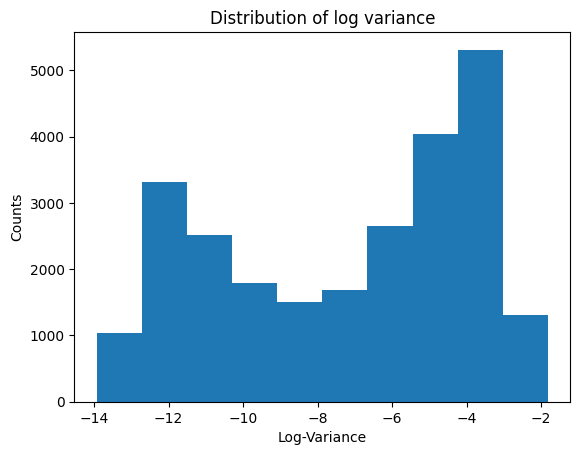

In [ ]:
plt.hist(log_var_mth)
plt.title("Distribution of log variance")
plt.xlabel("Log-Variance")
plt.ylabel("Counts")

Text(0, 0.5, 'Counts')

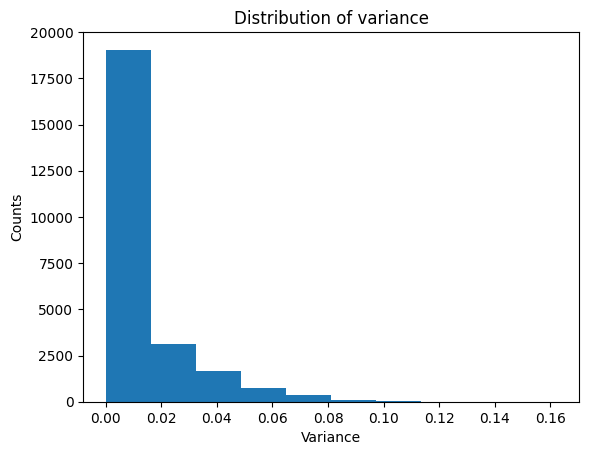

In [ ]:
plt.hist(vars_mth)
plt.title("Distribution of variance")
plt.xlabel("Variance")
plt.ylabel("Counts")

In [ ]:
# Select top 1000 HVGs

sorted_vars_mth=np.sort(log_var_mth)
top_vars_mth=sorted_vars_mth[-1000:] # Pick most variable genes (higher value indicates higher variance)
indices_mth=[i for i in range(len(vars_mth)) if log_var_mth[i] in top_vars_mth]
top_var_genes_mth=[loci[i] for i in indices_mth]
meth27Df_hvg = meth27Df_clean[top_var_genes_mth]
meth27Df_hvg

with open(os.path.join(rootDir, 'hvg_names_meth27.txt'), 'a') as f:
    for line in top_var_genes_mth:
        f.write(f"{line},")

In [ ]:
transcipts=miRNADf_clean.columns
means_mi=[]
vars_mi=[]
for i in transcipts:
  mean=miRNADf_clean[i].mean()
  means_mi.append(mean)
  var=miRNADf_clean[i].var()
  vars_mi.append(var)

In [ ]:
means_mi=np.array(means_mi)
vars_mi=np.array(vars_mi)

<ipython-input-32-093638813798>:7: RuntimeWarning: divide by zero encountered in log
  log_means_mi=np.log(means_mi)
<ipython-input-32-093638813798>:8: RuntimeWarning: divide by zero encountered in log
  log_vars_mi=np.log(vars_mi)


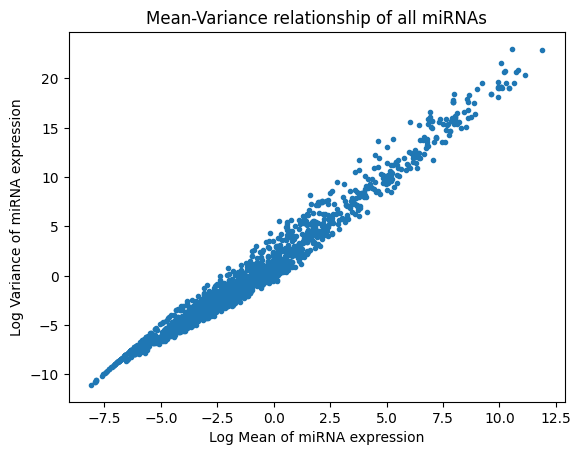

In [ ]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

def func(x, a, b,c):
     return a * np.log(x) + b * x + c

log_means_mi=np.log(means_mi)
log_vars_mi=np.log(vars_mi)

plt.scatter(log_means_mi,log_vars_mi,marker=".")
plt.xlabel("Log Mean of miRNA expression")
plt.ylabel("Log Variance of miRNA expression")
plt.title("Mean-Variance relationship of all miRNAs")
# plt.yscale("log")
# plt.xscale("log")

# optimizedParameters, pcov = curve_fit(func, means, vars)
# plt.scatter(means, func(means, *optimizedParameters), label="fit",c="r")
# plt.legend()
plt.show()

In [ ]:
infindices = np.where(log_vars_mi == -np.inf)
log_vars_mi[infindices] = 0
np.where(log_vars_mi == -np.inf)

(array([], dtype=int64),)

Text(0, 0.5, 'Counts')

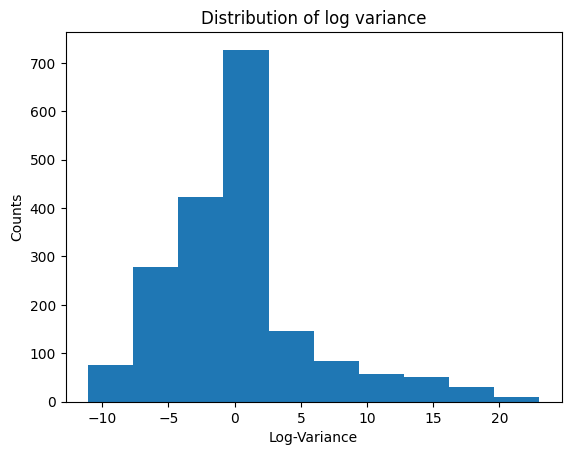

In [ ]:
plt.hist(log_vars_mi)
plt.title("Distribution of log variance")
plt.xlabel("Log-Variance")
plt.ylabel("Counts")

Text(0, 0.5, 'Counts')

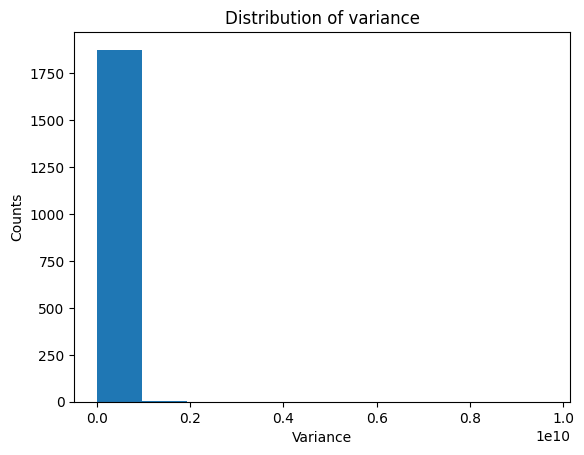

In [ ]:
plt.hist(vars_mi)
plt.title("Distribution of variance")
plt.xlabel("Variance")
plt.ylabel("Counts")

In [ ]:
# Select top 250 HVGs

sorted_vars_mi=np.sort(log_vars_mi)
top_vars_mi=sorted_vars_mi[-250:] # Pick most variable genes (higher value indicates higher variance)
indices_mi=[i for i in range(len(vars_mi)) if log_vars_mi[i] in top_vars_mi]
top_var_genes_mi=[transcipts[i] for i in indices_mi]
miRNADf_hvg = miRNADf_clean[top_var_genes_mi]
miRNADf_hvg

with open(os.path.join(rootDir, 'hvg_names_miRNA.txt'), 'a') as f:
    for line in top_var_genes_mi:
        f.write(f"{line},")

Now that we have selected 1000 HVGs from methylation 27 and 250 HVGs from miRNA, we perform standard scaling to account for heterogenous scales and variances.

In [ ]:
meth27_hvg=meth27Df_hvg.to_numpy()
miRNA_hvg=miRNADf_hvg.to_numpy()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
meth27_hvg_scaled = scaler.fit_transform(meth27_hvg)
miRNA_hvg_scaled = scaler.fit_transform(miRNA_hvg)

In [ ]:
np.savetxt(os.path.join(rootDir,"meth27_hvg_scaled.txt"), meth27_hvg_scaled)
np.savetxt(os.path.join(rootDir,"miRNA_hvg_scaled.txt"), miRNA_hvg_scaled)

# Dimensionality reduction methods are below.
I borrowed code from the paper, found here:
https://github.com/KarstenWendtTUD/sal-metaclustering/blob/v2/sal/models/transformation.py

Methods used:

1. PCA
2. Incremental PCA (IPCA)
3. Sparse PCA (SPCA)
4. SVD
5. Gaussian Random Projection (GRP)
6. Sparse Random Projection (SRP)
7. Multidimensional Scaling (MDS)
8. ISOMAP
9. Linear Local Embedding (LLE)
10. Mini-Batch Dictionary Learning (MBDL)
11. Autoencoder (AE)

In [ ]:
#main code for dimensionality reduction
from sklearn.decomposition import PCA, IncrementalPCA, SparsePCA, TruncatedSVD, MiniBatchDictionaryLearning
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.random_projection import GaussianRandomProjection, SparseRandomProjection
from sklearn.manifold import MDS, Isomap, LocallyLinearEmbedding


def transform_data(data,
                   reduced_dim,
                   mode:str,
                   batch_num:int=8,
                   seed:int=0):

  np.random.seed(seed=seed)

  if mode.lower() == 'pca':
    clf = PCA(n_components=reduced_dim)
    transformed_data = clf.fit_transform(data)

  elif mode.lower() == 'ipca':
    # batchsize = len(data)//batch_num
    clf = IncrementalPCA(n_components=reduced_dim,)
    transformed_data = clf.fit_transform(data)

  elif mode.lower() == 'spca':
    clf = SparsePCA(n_components=reduced_dim)
    transformed_data = clf.fit_transform(data)

  elif mode.lower() == 'svd':
    clf = TruncatedSVD(n_components=reduced_dim)
    transformed_data = clf.fit_transform(data)

  elif mode.lower() == 'grp':
    clf = GaussianRandomProjection(n_components=reduced_dim)
    transformed_data = clf.fit_transform(data)

  elif mode.lower() == 'srp':
    clf = SparseRandomProjection(n_components=reduced_dim)
    transformed_data = clf.fit_transform(data)

  elif mode.lower() == 'mds':
    clf = MDS(n_components=reduced_dim, normalized_stress=False)
    transformed_data = clf.fit_transform(data)

  elif mode.lower() == 'isomap':
    clf = Isomap(n_components=reduced_dim)
    transformed_data = clf.fit_transform(data)

  elif mode.lower() == 'lle':
    clf = LocallyLinearEmbedding(n_components=reduced_dim, eigen_solver="dense",)
    transformed_data = clf.fit_transform(data)

  elif mode.lower() == 'mbdl':
    clf = MiniBatchDictionaryLearning(n_components=reduced_dim)
    transformed_data = clf.fit_transform(data)

  return transformed_data, clf

## 1. PCA

In [ ]:
t_data, _ = transform_data(data, 20, 'pca')
print(t_data.shape)

(2000, 20)


## 2. Incremental PCA (IPCA)

In [ ]:
t_data, _ = transform_data(data, 20, 'ipca', batch_num=10)

## 3. Sparse PCA (SPCA)

In [ ]:
#extremely slow
t_data, _ = transform_data(data, 20, 'spca')

## 4. SVD

In [ ]:
t_data, _ = transform_data(data, 20, 'svd')

## 5. Gaussian Random Projection (GRP)

In [ ]:
t_data, _ = transform_data(data, 20, 'grp')

## 6. Sparse Random Projection (SRP)

In [ ]:
t_data, _ = transform_data(data, 20, 'srp')

## 7. Multidimensional Scaling (MDS)

In [ ]:
t_data, _ = transform_data(data, 20, 'mds')

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


## 8. ISOMAP

In [ ]:
t_data, _ = transform_data(data, 20, 'isomap')

## 9. Linear Local Embedding (LLE)

In [ ]:
t_data, _ = transform_data(data, 20, 'lle')

## 10. Mini-Batch Dictionary Learning (MBDL)

In [ ]:
t_data, _ = transform_data(data, 20, 'mbdl')

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:2290: FutureWarning: The default value of batch_size will change from 3 to 256 in 1.3.
  warnings.warn(


## Check variance represented in PCs

Total variance: 29712522765.05088
Working on pca
Working on ipca
Working on svd


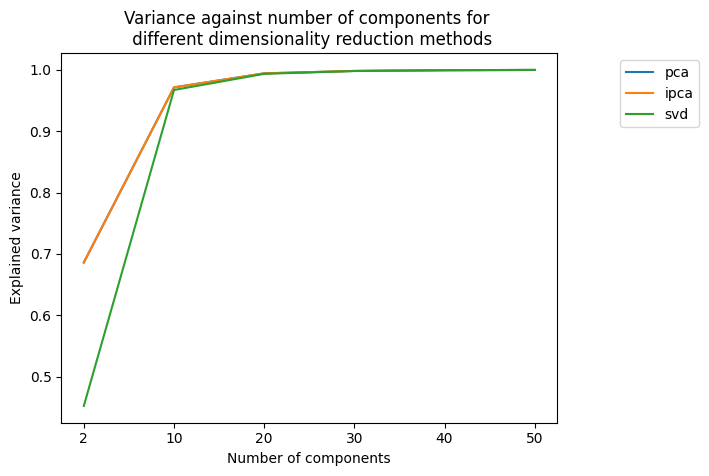

In [ ]:
import matplotlib.pyplot as plt

def calculate_variances(data, dr_methods):

  plt.Figure()

  total_var=np.sum(np.cov(data.T).diagonal())

  print("Total variance:", total_var)
  var_list = []

  for dr in dr_methods:

    print(f'Working on {dr}')
    tvar_list = []
    t_var = 0
    for n in range(2, 53, 10):
      t_data, _ = transform_data(data, n, dr)
      t_var = np.sum(np.cov(t_data.T).diagonal())/total_var
      tvar_list.append(t_var)

    plt.plot(range(len(tvar_list)), tvar_list, '-', label=dr)
    plt.xticks([0, 1, 2, 3, 4, 5], labels=['2', '10', '20', '30', '40', '50'])
    var_list.append(tvar_list)

  plt.xlabel('Number of components')
  plt.ylabel('Explained variance')
  plt.title('Variance against number of components for \n different dimensionality reduction methods')
  plt.legend(bbox_to_anchor=(1.3, 1))
  plt.show()
  plt.close()



dr_methods = ['pca', 'ipca', 'svd', ]
calculate_variances(data, dr_methods)


Working on pca


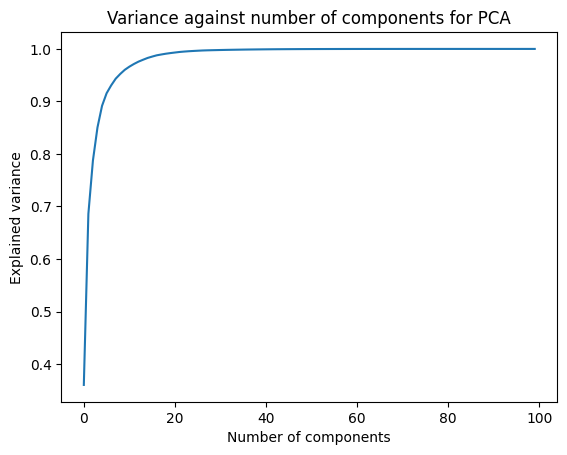

In [ ]:
import matplotlib.pyplot as plt

def calculate_variances(data, dr_methods):

  plt.Figure()

  for dr in dr_methods:

    print(f'Working on {dr}')
    t_data, clf = transform_data(data, 100, dr)
    tvar_list = clf.explained_variance_ratio_.cumsum()

    plt.plot(range(len(tvar_list)), tvar_list, '-',)
    # plt.xticks([0, 1, 2, 3, 4, 5], labels=['2', '10', '20', '30', '40', '50'])


  plt.xlabel('Number of components')
  plt.ylabel('Explained variance')
  plt.title('Variance against number of components for PCA')
  # plt.legend(bbox_to_anchor=(1.3, 1))
  plt.show()
  plt.close()



dr_methods = ['pca', ]
calculate_variances(data, dr_methods)

Working on PCA
Working on IPCA
Working on SVD
Working on GRP
Working on SRP
Working on MDS


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


Working on ISOMAP
Working on LLE
Working on MBDL


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:2290: FutureWarning: The default value of batch_size will change from 3 to 256 in 1.3.
  warnings.warn(


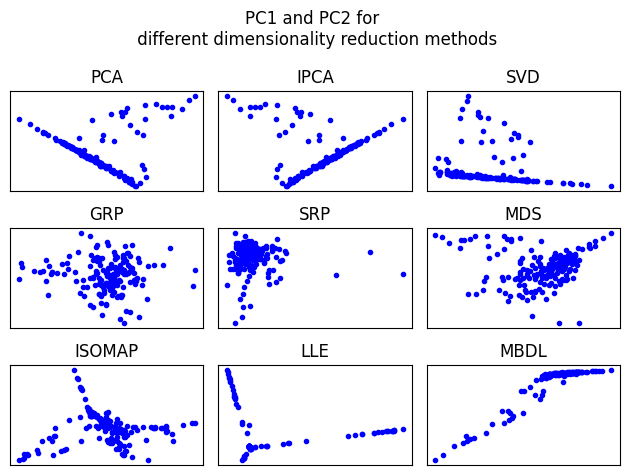

In [ ]:
import matplotlib.pyplot as plt

def calculate_pcs(data, dr_methods):

  fig, ax = plt.subplots(3, 3,)

  for i, dr in enumerate(dr_methods):

    print(f'Working on {dr}')

    row = i//3
    col = i%3

    t_data, _ = transform_data(data, 2, dr.lower())
    ax[row, col].plot(t_data[:, 0], t_data[:, 1], 'b.')
    ax[row, col].set_title(dr)
    ax[row, col].set_xticks([])
    ax[row, col].set_yticks([])

  fig.suptitle('PC1 and PC2 for \n different dimensionality reduction methods')
  # plt.legend(bbox_to_anchor=(1.3, 1))
  fig.tight_layout()
  plt.show()
  plt.close()

dr_methods = ['PCA', 'IPCA', 'SVD', 'GRP', 'SRP', 'MDS', 'ISOMAP', 'LLE',
               'MBDL',]
calculate_pcs(data, dr_methods)

In [ ]:
t_data, _ = transform_data(data, 20, 'pca')
np.save(os.path.join(rootDir, 'meth27_transformed.npy'), t_data)

# Clustering Algorithms

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, SpectralClustering, Birch, OPTICS, MeanShift, DBSCAN, estimate_bandwidth
from sklearn.mixture import GaussianMixture

def cluster_data(data,
                 mode:str,
                 num_classes:int=2,
                 num_workers:int=2):

  np.random.seed(seed=0)
  loss = 0

  if mode.lower() == 'kmeans':

    clf = KMeans(n_clusters=num_classes, n_init=10).fit(data)
    loss = clf.inertia_
    labels = clf.labels_

  elif mode.lower() == 'ac':

    clf = AgglomerativeClustering(n_clusters=num_classes,
                                                  linkage='ward').fit(data)
    labels = clf.labels_

  elif mode.lower() == 'sc':

    clf = SpectralClustering(n_clusters=num_classes,
                            n_jobs=num_workers).fit(data)
    labels = clf.labels_

  elif mode.lower() == 'linkage':

    clf = AgglomerativeClustering(n_clusters=num_classes,
                                                  affinity="cityblock",
                                                  linkage='average').fit(data)
    labels = clf.labels_

  elif mode.lower() == 'gm':

    labels = GaussianMixture(n_components=num_classes).fit_predict(data)

  elif mode.lower() == 'birch':

    clf = Birch(threshold=0.3, n_clusters=num_classes).fit(data)
    labels = clf.labels_

  elif mode.lower() == 'optics':

    clf = OPTICS(n_jobs=num_workers, min_cluster_size=15).fit(data)
    labels = clf.labels_

  elif mode.lower() == 'meanshift':

    bandwidth = estimate_bandwidth(data, quantile=0.2, n_samples=80)
    clf = MeanShift(bandwidth=bandwidth, n_jobs=num_workers).fit(data)
    labels = clf.labels_

  elif mode.lower() == 'dbscan':

    clf = DBSCAN(eps=0.7, min_samples=20, n_jobs=num_workers).fit(data)
    labels = clf.labels_

  elif mode.lower() == 'ap':

    clf = AffinityPropagation(preference=-50).fit(data)
    labels = clf.labels_

  return labels.reshape(-1,), loss


In [ ]:
label_list = []

## 1. K-Means

In [ ]:
y_pred, _ = cluster_data(t_data, 'kmeans', num_classes=2, num_workers=2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## 2. Agglomerative Clustering

In [ ]:
y_pred, _ = cluster_data(t_data, 'ac', num_classes=2, num_workers=2)

## 3. Spectral Clustering

In [ ]:
y_pred, _ = cluster_data(t_data, 'sc', num_classes=2, num_workers=2)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


## 4. Average Linkage

In [ ]:
y_pred, _ = cluster_data(t_data, 'linkage', num_classes=2, num_workers=2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


## 5. Gaussian Mixture Model

In [ ]:
y_pred, _ = cluster_data(t_data, 'gm', num_classes=2, num_workers=2)

## 6. Birch

In [ ]:
y_pred, _ = cluster_data(t_data, 'birch', num_classes=2, num_workers=2)

## 7. OPTICS

In [ ]:
y_pred, _ = cluster_data(t_data, 'optics', num_classes=2, num_workers=2)

## 8. Mean Shift

In [ ]:
y_pred, _ = cluster_data(t_data, 'meanshift', num_classes=2, num_workers=2)

## 9. DBScan

In [ ]:
y_pred, _ = cluster_data(t_data, 'dbscan', num_classes=2, num_workers=2)

## 10. Affinity Propagation

In [ ]:
y_pred, _ = cluster_data(t_data, 'ap', num_classes=2, num_workers=2)

# Run Meta-clustering

## Run Meta-clustering

In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

def meta_clustering(data,
                dimreg_alg,
                cluster_alg,
                    n_classes):

  """
    Main code to run meta-clustering

    Parameters:
    data: n x features nd array
    dimreg_alg: list of dimension reduction methods to try
    cluster_alg: list of clustering algorithms to try
    n_classes: int of clusters for final k-means

    Returns:
    y_pred: (n,) ndarray of predicted labels for each sample
    flat_feature_set: n x len(dimreg_alg) * len(cluster_alg) * 5  ndarray of results from all possible combinations of dimensionality
                      reduction and clustering algorithms for 5 possible reduced dimensions.
  """

  scores = np.zeros((len(dimreg_alg), len(cluster_alg), 5, 3))
  feature_set = np.zeros((data.shape[0], len(dimreg_alg), len(cluster_alg), 5))

  #iterate over all combinations and all k values for dimension reduction
  for i in range(len(dimreg_alg)):

    for j in range(len(cluster_alg)):

      for k in range(2, 12, 2):

        t_data, _ = transform_data(data, k, dimreg_alg[i])

        try:
          y_pred, _ = cluster_data(t_data, cluster_alg[j], num_classes=3, num_workers=2)
          n, counts = np.unique(y_pred, return_counts=True)
          if np.any(counts < 10):
            print(counts)
            print(f'Ignoring combination: {dimreg_alg[i]}, {cluster_alg[j]}, reduced_dim = {k}')

          # scores[i, j, k-2, :] = calculate_score(t_data, y_pred)
          feature_set[:, i, j, k-2] = y_pred

        except:
          continue

      print(f'Done with combination: {dimreg_alg[i]}, {cluster_alg[j]}')

  #Omit combinations which are not valid due to small clusters
  flat_feature_set = feature_set.reshape(data.shape[0], -1)
  not_valid_idx = np.where(np.all(flat_feature_set, axis=0) == 0)[0]
  valid_idx = [i for i in range(flat_feature_set.shape[1]) if i not in not_valid_idx]
  flat_feature_set = flat_feature_set[:, valid_idx]

  #Transform and cluster by metadata
  t_y_data, clf = transform_data(flat_feature_set, 20, 'pca')
  y_pred, _ = cluster_data(t_y_data, 'kmeans', num_classes=n_classes, num_workers=2)

  #Print counts for each label
  print(np.unique(y_pred, return_counts=True))

  return y_pred, flat_feature_set


#### Run Meta-clustering ####

dimreg_alg = ['pca', 'ipca', 'svd', 'grp', 'srp', 'mds', 'isomap', 'lle', 'mbdl']

cluster_alg = ['kmeans', 'ac', 'sc', 'linkage', 'gm', 'birch', 'OPTICS',
               'meanshift', 'dbscan', 'ap']

#Load Data
meth27_hvg_scaled = pd.read_csv(os.path.join(rootDir, 'meth27_hvg_scaled.txt'), delimiter=' ', header=None).to_numpy()
miRNA_hvg_scaled = pd.read_csv(os.path.join(rootDir, 'miRNA_hvg_scaled.txt'), delimiter=' ', header=None).to_numpy()

merged_data = np.concatenate([meth27_hvg_scaled, miRNA_hvg_scaled], axis=1)
y_pred, flat_feature_set = meta_clustering(merged_data,
                            dimreg_alg,
                            cluster_alg,
                            3)


NameError: ignored

In [ ]:
np.save(os.path.join(rootDir, 'y_pred_mc'), y_pred)

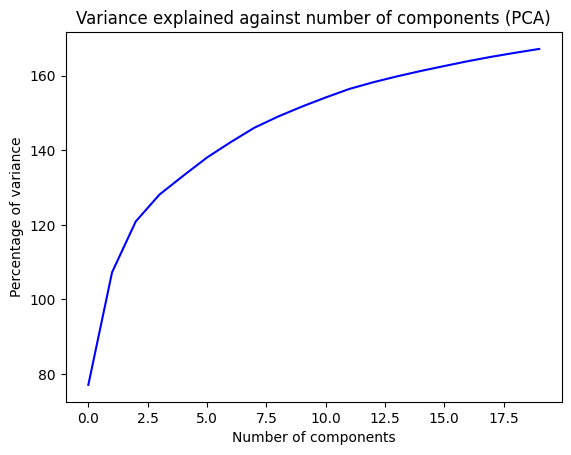

In [ ]:


t_y_data, clf = transform_data(flat_feature_set, 20, 'pca')
ratios = clf.explained_variance_.cumsum()

plt.Figure()
plt.plot(range(len(ratios)), ratios, 'b-')
plt.title('Variance explained against number of components (PCA)')
plt.xlabel('Number of components')
plt.ylabel('Percentage of variance')
plt.show()

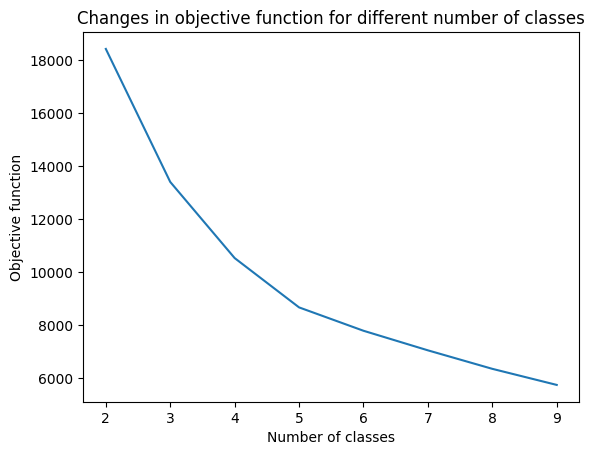

In [ ]:
#Get best k values for metaclustering

loss_list = []

for k in range(2, 10):
    y_pred, loss = cluster_data(t_y_data, 'kmeans', num_classes=k, num_workers=2)
    loss_list.append(loss)

plt.plot(range(2, 10), loss_list)
plt.xlabel('Number of classes')
plt.ylabel('Objective function')
plt.title('Changes in objective function for different number of classes')
plt.show()


# Robust MKKC

In [ ]:
from sklearn.metrics.pairwise import rbf_kernel as rbf

"""
Main code for MKKC method based on github.com/SeojinBang/MKKC

"""

def WithinClusterSS(K, H):

    """
    Calculates sum of squares within a group for a given square matrix

    Parameters:
    K: N X N ndarray
    H: ndarray of kernel weights

    Returns:
    sum of squares (float)
    """

    return np.sum(np.diag(K)) - np.sum(np.diag(H.T @ K @ H))

def BtwClusterSS(K, H):

    """
    Calculates sum of squares between groups for a given square matrix

    Parameters:
    K: N X N ndarray
    H: ndarray of kernel weights

    Returns:
    sum of squares (float)

    """

    return np.sum(np.diag(H.T @ K @ H))

def weighted_onehot(labels, centers):

    """
    Convert labels to a one-hot encoded matrix

    Parameters:
    labels: N, ndarray

    Returns:
    arr: N x num. of labels, ndarray
    """

    arr = np.zeros((labels.shape[0], centers))
    _, counts = np.unique(labels, return_counts=True)
    for i in range(centers):
        arr[np.where(labels == i), i] = 1/np.sqrt(counts[i])

    return arr


def mkkc(km,
         centers,
         theta,
         iter_max=10,
         epsilon:float = 1e-04,
         ):

    """
    Run MKKC.


    """

    assert centers > 0, "Number of cluster centers must be larger than 0"
    assert km.ndim==3, "Combined kernel matrix should be a N x N x P array"
    assert np.isnan(np.sum(km)) == False, "NaNs found in kernel matrix"

    P = km.shape[-1]
    theta = theta.reshape(1,1, P)

    #initialize combined kernel matrix
    ktheta = np.sum(km * theta, axis=-1)

    #initialize H
    h_eigval, h_eigvec = np.linalg.eig(ktheta)
    h = h_eigvec[:, :centers]

    for iter in range(iter_max):

        theta0 = theta

        if iter > 0:
            theta = np.zeros((1, 1, P))
            for i in range(P):
                theta[..., i] = WithinClusterSS(km[:, :, i], h).real
            theta /= np.sqrt(np.sum(theta**2))

        #update combined kernel matrix
        ktheta = np.zeros((km.shape[0], km.shape[1]))
        ktheta =  np.sum(km * theta, axis=-1)

        #update H
        h_eigval, h_eigvec = np.linalg.eig(ktheta)
        h = h_eigvec[:, :centers]

        #Check tolerance
        l2_dist = np.sqrt(np.sum((theta0-theta)**2))
        if (l2_dist < epsilon) and (iter > 0):
            break

        if iter == iter_max:
            print(f'Did not converge in {iter} iterations.')

    #Recover cluster index
    hnorm = h/np.sqrt(np.sum(h**2, axis=0))

    #perform kmeans
    kmeans = KMeans(n_clusters=centers, max_iter=500, n_init=1500).fit(hnorm)
    clusters = kmeans.labels_
    ohe_clusters = weighted_onehot(clusters, centers)

    #Calculate within cluster distances
    stats = {}
    stats['within_total'] = WithinClusterSS(ktheta, ohe_clusters)
    stats['within_view'] = []
    for v in range(P):
        stats['within_view'].append(WithinClusterSS(km[:, :, v], ohe_clusters))

    stats['within_cluster'] = []
    for c in range(centers):
        non_zero = np.where(ohe_clusters[:, c:c+1] != 0)[0]
        stats['within_cluster'].append(WithinClusterSS(ktheta[non_zero][:, non_zero], ohe_clusters[non_zero, c:c+1]))

    stats['within_cluster_view'] = []
    for v in range(P):
        for c in range(centers):
            non_zero = np.where(ohe_clusters[:, c:c+1] != 0)[0]
            stats['within_cluster_view'].append(WithinClusterSS(km[non_zero][:, non_zero, v], ohe_clusters[non_zero, c:c+1]))


    #Between cluster distances
    stats['btwn_total'] = BtwClusterSS(ktheta, ohe_clusters)
    stats['btwn_view'] = []
    for v in range(P):
        stats['btwn_view'] = BtwClusterSS(km[:, :, v], ohe_clusters)

    stats['coefficients'] = theta
    _, counts = np.unique(clusters, return_counts=True)
    stats['size'] = counts

    return clusters, stats


def StandardizeKernel(km):

    assert np.isnan(np.sum(km)) == False, "NaNs found in kernel matrix"

    unit_mat = np.full((km.shape[0], km.shape[1]), 1/km.shape[0])
    km = km - unit_mat @ km - km @ unit_mat + unit_mat @ km @ unit_mat

    km = km/np.sum(np.diag(km))

    return km

def stats_printer(stats,
                  P,
                  centers):


    print('Number of samples in each cluster:\n', stats['size'])
    print('Kernel coefficients:\n', stats['coefficients'][0][0])
    print('Within cluster SS:\n', stats['within_cluster'])

    stats_v_cl = np.array(stats['within_cluster_view']).reshape(P, centers)
    col_list = [f'cluster {i}' for i in range(centers)]
    row_list = [f'view {i}' for i in range(P)]
    df = pd.DataFrame(data=stats_v_cl,
                      index=row_list,
                      columns=col_list)
    print('Within cluster SS by cluster for each view:')
    print(df)


def robust_mkkc(data,
         P,
         centers):


    #produce kernel matrices and stanadardize
    km = np.zeros((data[0].shape[0], data[0].shape[0], P))
    for i in range(P):
        st_kernel = rbf(data[i], gamma=0.05)

        km[:, :, i] = StandardizeKernel(st_kernel)

    #run MKKC
    theta = np.ones((P))/P

    labels, stats = mkkc(km, centers, theta)

    #Print stats
    stats_printer(stats, P, centers)

    return labels, stats

## Run MKKC

In [141]:
#Load Data
meth27_hvg_scaled = pd.read_csv(os.path.join(rootDir, 'meth27_hvg_scaled.txt'), delimiter=' ', header=None).to_numpy()
miRNA_hvg_scaled = pd.read_csv(os.path.join(rootDir, 'miRNA_hvg_scaled.txt'), delimiter=' ', header=None).to_numpy()
print(meth27_hvg_scaled.shape, miRNA_hvg_scaled.shape)

#Run MKKC
t_data_meth27, _ = transform_data(meth27_hvg_scaled, 30, 'pca')
t_data_mirna, _ = transform_data(miRNA_hvg_scaled, 30, 'pca')

y_pred_mkkc, mkkc_stats = robust_mkkc([t_data_meth27, t_data_mirna], 2, 3)

(169, 1000) (169, 250)
Number of samples in each cluster:
 [ 28 119  22]
Kernel coefficients:
 [0.69127676 0.72259009]
Within cluster SS:
 [0.19452714593833276, 0.9999159494820542, 0.15729586108643465]
Within cluster SS by cluster for each view:
        cluster 0  cluster 1  cluster 2
view 0   0.114073   0.712048   0.096372
view 1   0.160078   0.702603   0.125488


# Assess clustering

## Using clustering metrics

In [ ]:
def calculate_score(data,
                    labels,
                    ):

  sil_score = silhouette_score(data, labels)
  ch_score = calinski_harabasz_score(data, labels)
  db_score = davies_bouldin_score(data, labels)

  return sil_score, ch_score, db_score


mkkc_ch = mkkc_stats['btwn_total']/mkkc_stats['within_total']
print('Calinski-harabasz score for MKKC: ', mkkc_ch)
print('Calinski-harabasz score for MC: ', calinski_harabasz_score(merged_data, y_pred))

mkkc_dbi =mkkc_stats['within_total']/ mkkc_stats['btwn_total']
print('Davies-bouldin Index for MKKC: ', mkkc_dbi)
print('Davies-bouldin Index for MC: ', davies_bouldin_score(merged_data, y_pred))


Calinski-harabasz score for MKKC:  0.06984822630342434
Calinski-harabasz score for MC:  1.53486007803355
Davies-bouldin Index for MKKC:  14.316755813611469
Davies-bouldin Index for MC:  5.578979855241638


## Using feature perturbation

In [ ]:
from scipy.stats import gaussian_kde

def perturb_features(data,
                     prop_to_perturb):

  # num_features = data.shape[0]
  num_to_perturb = int(data.shape[0]*prop_to_perturb)

  chosen_idx_features = np.random.choice(range(data.shape[0]), size=num_to_perturb, replace=False)

  shuffled = data.copy()

  for i in range(data.shape[0]):
    kde = gaussian_kde(data[:, i])
    new_data = kde.resample(num_to_perturb)
    shuffled[chosen_idx_features, i] = new_data

  return shuffled

y_pred_mkkc_list = [y_pred_mkkc,]
shuffled_data_list = [(meth27_hvg_scaled, miRNA_hvg_scaled),]

t_data_meth27, _ = transform_data(meth27_hvg_scaled, 30, 'pca')
t_data_mirna, _ = transform_data(miRNA_hvg_scaled, 30, 'pca')

y_pred_mkkc, mkkc_stats = robust_mkkc([t_data_meth27, t_data_mirna], 2, 3)
y_pred_mkkc_list = [y_pred_mkkc,]
shuffled_data_list = [(meth27_hvg_scaled, miRNA_hvg_scaled),]

for p in [0.1, 0.2, 0.5, 0.75, 1.0]:


  # print(meth27_hvg_scaled[:5, :5])

  shuffled_meth = perturb_features(meth27_hvg_scaled, p)
  shuffled_mirna = perturb_features(miRNA_hvg_scaled, p)
  shuffled_data_list.append((shuffled_meth, shuffled_mirna))

  # print(shuffled_meth[:5, :5])

  #Run MKKC
  t_data_meth27, _ = transform_data(shuffled_meth, 30, 'pca')
  t_data_mirna, _ = transform_data(shuffled_mirna, 30, 'pca')

  # t_data_meth27 = shuffled_meth
  # t_data_mirna = shuffled_mirna
  y_pred_mkkc_pb, mkkc_stats = robust_mkkc([t_data_meth27, t_data_mirna], 2, 3)
  y_pred_mkkc_list.append(y_pred_mkkc_pb)

  print('Results for :', p)

  mkkc_ch = mkkc_stats['btwn_total']/mkkc_stats['within_total']
  print('Calinski-harabasz score for MKKC: ', mkkc_ch)

  mkkc_dbi =mkkc_stats['within_total']/ mkkc_stats['btwn_total']
  print('Davies-bouldin Index for MKKC: ', mkkc_dbi)

Number of samples in each cluster:
 [ 28 119  22]
Kernel coefficients:
 [0.69127676 0.72259009]
Within cluster SS:
 [0.19452714593833276, 0.9999159494820542, 0.15729586108643465]
Within cluster SS by cluster for each view:
        cluster 0  cluster 1  cluster 2
view 0   0.114073   0.712048   0.096372
view 1   0.160078   0.702603   0.125488
Number of samples in each cluster:
 [124  22  23]
Kernel coefficients:
 [0.69289294 0.72104048]
Within cluster SS:
 [1.0405743837947494, 0.15600990588994293, 0.15711692900700844]
Within cluster SS by cluster for each view:
        cluster 0  cluster 1  cluster 2
view 0   0.740428   0.094669   0.090283
view 1   0.731633   0.125394   0.131144
Results for : 0.1
Calinski-harabasz score for MKKC:  0.044494457542008536
Davies-bouldin Index for MKKC:  22.4747093288163
Number of samples in each cluster:
 [129  19  21]
Kernel coefficients:
 [0.69430891 0.71967711]
Within cluster SS:
 [1.0818438798890835, 0.13412848787390566, 0.143739580939592]
Within cluster

## Find DE features

In [ ]:
prop_list = [0, 0.1, 0.2, 0.5, 0.75, 0.9]
meth_idx = list(pd.read_csv(os.path.join(rootDir, 'hvg_names_meth27.txt')).columns)[:-1]
mirna_idx = list(pd.read_csv(os.path.join(rootDir, 'hvg_names_miRNA.txt')).columns)[:-1]

hvg_name = meth_idx + mirna_idx

de_feat_list = []

# Find DE features for MKKC
for i, data in enumerate(shuffled_data_list):
  merged_data = np.concatenate([data[0], data[1]], axis=1)
  sorted_MKKC_data, feature_idx_mkkc = get_de_feat(merged_data, y_pred_mkkc_list[i], 0.05)

  # Get MKKC feature names
  var_feature_names = [hvg_name[i] for i in feature_idx_mkkc]

  with open(os.path.join(rootDir, f'DE_feature_names_perturb{prop_list[i]}.txt'), 'a') as f:
      for line in var_feature_names:
          f.write(f"{line},")

  de_feat_list.append(set(feature_idx_mkkc))


Number of initial features:  1250
Number of siginificantly different features:  946
Number of initial features:  1250
Number of siginificantly different features:  795


In [ ]:
def change_labels(data,
                  init_l, end_l):

  extract = np.where(data == init_l)
  to_fill = np.where(data == end_l)
  data[to_fill] = np.max(data) + 1
  data[extract] = end_l
  data[to_fill] = init_l

  return data

y_pred_mkkc_list[4] = change_labels(y_pred_mkkc_list[4], 0, 1)

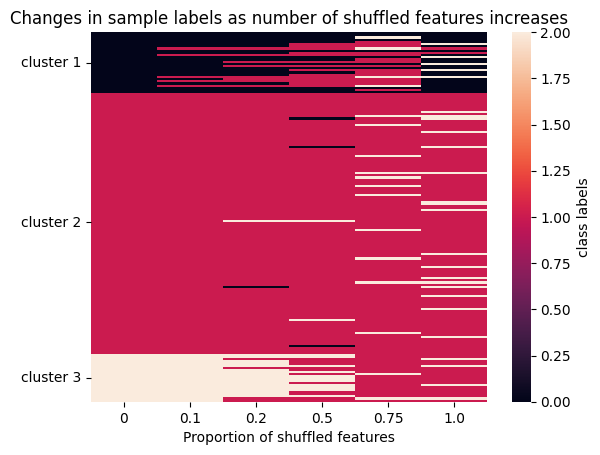

In [ ]:
import seaborn as sns

y_pred_mkkc_list = [x.reshape(-1, 1).astype(np.uint8) for x in y_pred_mkkc_list]
labels = np.concatenate(y_pred_mkkc_list, axis=1)
labels = labels[np.argsort(labels[:, 0]), :]

new_labels, n_counts_init = np.unique(y_pred_mkkc, return_counts=True)
ax = sns.heatmap(labels,
                 cbar_kws={'label': 'class labels'}
                 )
n_counts = [0] + list(n_counts_init.cumsum())
num_ticks = [(n_counts[i] - n_counts[i-1])//2 + n_counts[i-1] for i in range(1, len(n_counts))]
ax.set_yticks(num_ticks)
ax.set_yticklabels(['cluster 1', 'cluster 2', 'cluster 3'])

ax.set_xticklabels([0, 0.1, 0.2, 0.5, 0.75, 1.0])
plt.title('Changes in sample labels as number of shuffled features increases')
plt.xlabel('Proportion of shuffled features')

plt.show()

/usr/local/lib/python3.10/dist-packages/matplotlib_venn/_venn3.py:117: UserWarning: Bad circle positioning
  warnings.warn("Bad circle positioning")


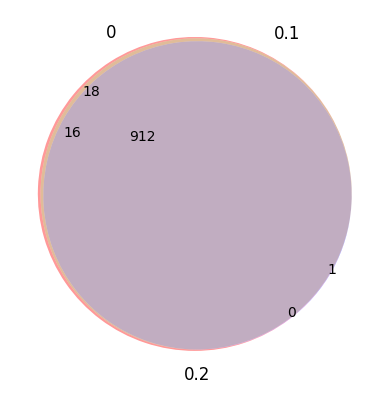

In [ ]:
import pylab as plt
from matplotlib_venn import venn3, venn3_circles


venn3(de_feat_list[:3], tuple(prop_list))

plt.show()

#Plot UMAPs and HEATMAPs

## Plot UMAPs

In [ ]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 6.2 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=bb2dd5792f31226c3c4cbbed9797670e85fed30a5752d081fd72cfd853a295ee
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [ ]:
import matplotlib.pyplot as plt
import umap

dimreg_alg = ['pca', 'ipca', 'spca', 'svd', 'grp', 'srp', 'mds', 'isomap', 'lle', 'mbdl']

cluster_alg = ['KMeans', 'Agg. Clustering', 'Spectral Clustering', 'Avg. Linkage', 'GMM', 'Birch', 'OPTICS',
               'Mean-shift',]

def make_umap(data, label):

  embedding = umap.UMAP(random_state=10).fit_transform(data)
  c = ['b', 'r', 'g', 'y']

  plt.Figure()
  for j in range(4):
          l = label.reshape(-1,)
          pts = embedding[l == j,:]
          plt.plot(pts[:, 0], pts[:, 1], c[j]+'.')
  plt.title('Samples clustered by label predictions')
  plt.axis('off')

  # fig.tight_layout()

  plt.show()

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


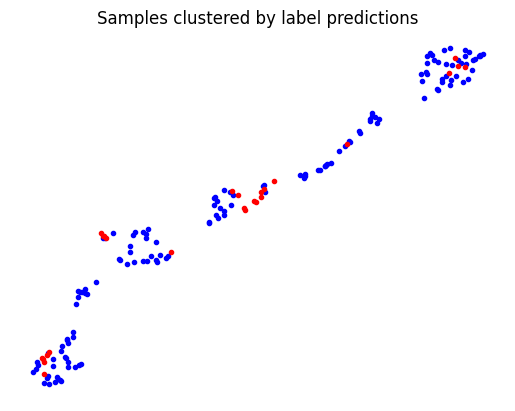

In [ ]:
### Create UMAP #####
t_mkkc_data = np.concatenate([t_data_meth27, t_data_mirna], axis=1)
make_umap(t_mkkc_data, y_pred_mkkc)

## Get differentially expressed features

In [143]:
import scipy.stats as stats


def get_de_feat(data,
                y_pred,
                p_thresh):

  num_clusters = len(np.unique(y_pred))

  data_arr = []
  for i in range(num_clusters):
    data_1 = data[np.where(y_pred == i)[0]]
    data_arr.append(data_1)


  pvalue_list = []

  #Run ANOVA
  for i in range(data.shape[1]):
    _, pvalue = stats.f_oneway(data_arr[0][:, i],
                                    data_arr[1][:, i],
                                    data_arr[2][:, i],
                                    )
    pvalue_list.append(pvalue)

  #p_value correction using Benjamini-Hochberg
  adj_p = stats.false_discovery_control(pvalue_list)
  feature_idx = np.where(adj_p < p_thresh)[0]
  selected_adj_p = adj_p[feature_idx]


  #Sort array by labels
  sorted_data = data[np.argsort(y_pred)]

  #Sort columns by DEG
  print('Number of initial features: ', sorted_data.shape[1])
  sorted_data = sorted_data[:, feature_idx]
  print('Number of siginificantly different features: ', sorted_data.shape[1])
  sorted_data = sorted_data[:, np.argsort(selected_adj_p)[::-1]]

  return sorted_data, feature_idx, selected_adj_p

In [ ]:
# Find DE features for MKKC
meth_idx = list(pd.read_csv(os.path.join(rootDir, 'hvg_names_meth27.txt')).columns)[:-1]
mirna_idx = list(pd.read_csv(os.path.join(rootDir, 'hvg_names_miRNA.txt')).columns)[:-1]

hvg_name = meth_idx + mirna_idx

concat_data = np.concatenate([meth27_hvg_scaled, miRNA_hvg_scaled], axis=1)
print(y_pred_mkkc_list[0].shape)

sorted_MKKC_data, feature_idx_mkkc, p_value_list = get_de_feat(concat_data, y_pred_mkkc_list[0].reshape(-1), 0.05)


# Get MKKC feature names
var_feature_names = [hvg_name[i] for i in feature_idx_mkkc]

de_df = pd.DataFrame({'feature':var_feature_names,
                      'p_adj':p_value_list})

with open(os.path.join(rootDir, 'DE_feature_names.txt'), 'a') as f:
    for line in var_feature_names:
        f.write(f"{line},")

de_df.to_csv(os.path.join(rootDir, 'cpg_p_values.txt'))
print(de_df)

(169, 1)
Number of initial features:  1250
Number of siginificantly different features:  944
           feature         p_adj
0       cg00027083  1.066654e-07
1       cg00134539  9.906368e-04
2       cg00145348  2.953875e-10
3       cg00186701  4.995769e-08
4       cg00187380  1.991816e-06
..             ...           ...
939  hsa-mir-26a-2  2.843650e-02
940    hsa-mir-455  2.996581e-04
941   hsa-mir-500a  4.915137e-02
942    hsa-mir-532  4.833799e-02
943     hsa-mir-93  4.423720e-02

[944 rows x 2 columns]


In [ ]:
#Get DE features for meta-clustering
concat_data = np.concatenate([meth27_hvg_scaled, miRNA_hvg_scaled], axis=1)
print(y_pred.shape)

sorted_MC_data, feature_idx_mc= get_de_feat(concat_data, y_pred, 0.05)

# Get MKKC feature names
hvg_name = top_var_genes_mth + top_var_genes_mi
var_feature_names = [hvg_name[i] for i in feature_idx_mc]

with open(os.path.join(rootDir, 'DE_feature_names_metaclustering.txt'), 'a') as f:
    for line in var_feature_names:
        f.write(f"{line},")

(169,)
Number of initial features:  1250
Number of siginificantly different features:  949


## Plot heatmap

[ 28 119  22]


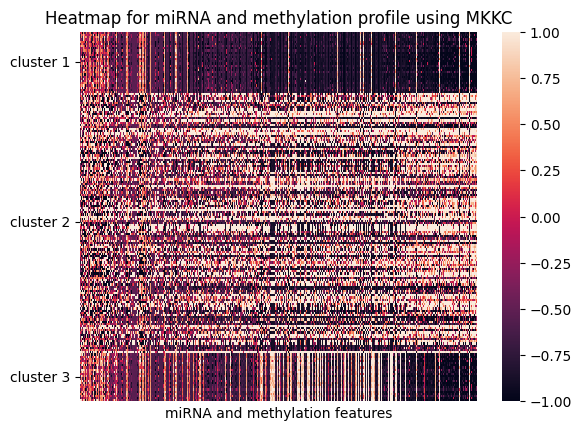

In [ ]:
#plot heatmap for mkkc results

import seaborn as sns

labels, n_counts_init = np.unique(y_pred_mkkc_list[0], return_counts=True)
print(n_counts_init)

ax = sns.heatmap(sorted_MKKC_data,
                 vmin=-1,
                 vmax=1
                 )
n_counts = [0] + list(n_counts_init.cumsum())
num_ticks = [(n_counts[i] - n_counts[i-1])//2 + n_counts[i-1] for i in range(1, len(n_counts))]
ax.set_yticks(num_ticks)
ax.set_yticklabels(['cluster 1', 'cluster 2', 'cluster 3'])

ax.set_xticks([])
plt.title('Heatmap for miRNA and methylation profile using MKKC')
plt.xlabel('miRNA and methylation features')
plt.show()

[54 78 37]


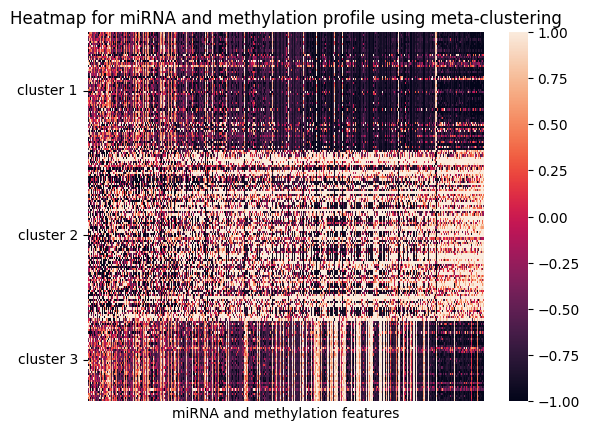

In [ ]:
#plot heatmap for MC results

import seaborn as sns

labels, n_counts_init = np.unique(y_pred, return_counts=True)
print(n_counts_init)
ax = sns.heatmap(sorted_MC_data,
                 vmin=-1,
                 vmax=1
                 )
n_counts = [0] + list(n_counts_init.cumsum())
num_ticks = [(n_counts[i] - n_counts[i-1])//2 + n_counts[i-1] for i in range(1, len(n_counts))]
ax.set_yticks(num_ticks)
ax.set_yticklabels(['cluster 1', 'cluster 2', 'cluster 3'])

ax.set_xticks([])
plt.title('Heatmap for miRNA and methylation profile using meta-clustering')
plt.xlabel('miRNA and methylation features')
plt.show()

## Plot heatmap of DE miRNAs for MKKC

[ 28 119  22]


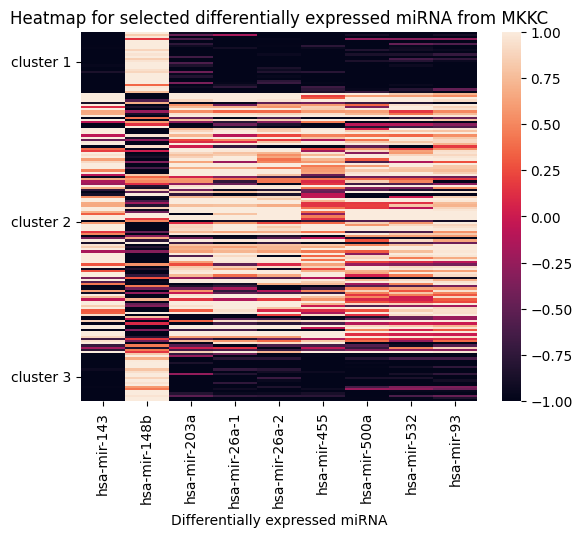

In [154]:
#plot heatmap for mkkc results

import seaborn as sns

labels, n_counts_init = np.unique(y_pred_mkkc, return_counts=True)
print(n_counts_init)

ax = sns.heatmap(sorted_MKKC_data[:, -9:],
                 vmin=-1,
                 vmax=1
                 )
n_counts = [0] + list(n_counts_init.cumsum())
num_ticks = [(n_counts[i] - n_counts[i-1])//2 + n_counts[i-1] for i in range(1, len(n_counts))]
ax.set_yticks(num_ticks)
ax.set_yticklabels(['cluster 1', 'cluster 2', 'cluster 3'])

ax.set_xticklabels([hvg_name[i] for i in feature_idx_mkkc[-9:]], rotation=90)
plt.title('Heatmap for selected differentially expressed miRNA from MKKC')
plt.xlabel('Differentially expressed miRNA')
plt.show()

In [146]:
print(feature_idx_mkkc[-9:])

[1053 1060 1098 1115 1116 1187 1199 1203 1244]
